# Simplex aplicado à função Rosenbrock

Este algoritmo aplica o método de otimização Simplex à função matemática de Rosenbrock, a qual é definida pela equação geral:

\begin{equation}
f(x,y) = (a - x)^2 + b(y - x^2)^2 ,
\end{equation}

onde $a$ e $b$ são constantes e o mínimo dessa função é $(x,y)=(a,a^2)$, onde $f(a,a^2)=0$. Normalmente $a$ e $b$ são iguais a 1 e a 100, respectivamente, nesse caso, o mínimo dessa função é $(x,y)=(1,1)$.

Então a função a ser minimizada através do método de busca Simplex é:

\begin{equation}
f(p_1,p_2) = 100(p_2 - p_1^2)^2 + (p_1 - 1)^2 ,
\end{equation}

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq
from matplotlib import animation

## Plotando a função

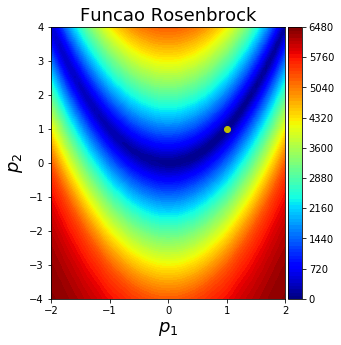

In [2]:
# numero de parametros de p1 e p2
np1 = 50
np2 = 50

#definindo os parâmetros
p1 = np.linspace(-2., 2., np1)
p2 = np.linspace(-4., 4., np2)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = 100.*(p2 - p1*p1)*(p2 - p1*p1) + (p1 - 1.)*(p1 - 1.)

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(np1,np2))

#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()


# Funções

In [3]:
# calculando a phi
def rosenbrock(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 100.*(p0[1] - p0[0]*p0[0])*(p0[1] - p0[0]*p0[0]) + (p0[0] - 1.)*(p0[0] - 1.)
    
    return phi

In [4]:
# chute inicial
p0 = np.array([-1.8,-3.8,-1.,-2., 0., -1.5]) 
p0 = np.reshape(p0, (3,2))

# valores da função para cada ponto
f1 = rosenbrock(p0[0])
f2 = rosenbrock(p0[1])
f3 = rosenbrock(p0[2])   
f0 = np.array([f1, f2, f3])

# identificando o valor mínimo
iL = np.argmin(f0)

# armazenando o melhor chute
p1_list = [p0[iL][0]]
p2_list = [p0[iL][1]]
f_list = [f0[iL]]

# parâmetros do código
alfa = 1.
gamma = 2.
beta = 0.5

# número de iteração máximo
itmax = 100

# parâmetros máximo e mínimo
p1max = 1.9
p2max = 3.9
p1min = -1.9
p2min = -3.9

# Algoritmo Simplex

In [5]:
for it in range(itmax):
    # verificando se os parâmetros estão na caixa
    i1max = np.argwhere(p0[:,0]>p1max)
    p0[i1max,1] = p1max
    i2max = np.argwhere(p0[:,1]>p2max)
    p0[i2max,1] = p2max
    i1min = np.argwhere(p0[:,0]<p1min)
    p0[i1min,1] = p1min
    i2min = np.argwhere(p0[:,1]<p2min)
    p0[i2min,1] = p2min
    
    # salvando snapshots
    #p0_movie = np.vstack((p0, p0[0,:]))
    #plot
    #plt.figure(figsize=(15,15))
    
    #plt.plot(p1_list, p2_list, '.w-', markersize=4)
    #plt.plot(p0_movie[:,0], p0_movie[:,1], 'o-w', markersize=5)
    #plt.plot(1., 1., 'oy')
    #plt.title('Simplex - Rosenbrock'+str(it), fontsize=18)
    #plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
    #plt.xlabel('$p_1$', fontsize=18)
    #plt.ylabel('$p_2$', fontsize=18)
    #plt.colorbar(pad=0.01, aspect=20, shrink=1)
    #plt.savefig('simplex_snap'+str(it)+'.png', pad_inches=0.0)
    
    # etapa 2: calcula f para cada par de parâmetros
    f1 = rosenbrock(p0[0])
    f2 = rosenbrock(p0[1])
    f3 = rosenbrock(p0[2])

    f0 = np.array([f1, f2, f3])
    
    # etapa 3: defini-se os valores máximo e mínimo
    iH = np.argmax(f0)
    iL = np.argmin(f0)
    
    fH = f0[iH]
    fL = f0[iL]
    fi = np.delete(f0, [iH, iL], 0)
    fi = np.float(fi)
    
    pH = p0[iH]
    pL = p0[iL]
    pi = np.delete(p0, [iH, iL], 0)
    pi = np.reshape(pi, (2,))
    #print pi
    
    p0d = np.delete(p0, iH, 0)
    f0d = np.delete(f0, iH, 0)
    # etapa 4: caçcula o centróide
    pC = 0.5*(p0d[0,:] + p0d[1,:])
    
    # etapa 5: reflexão
    pR = pC + alfa*(pC - pH)
    #print pR
    #print 'pH', pH, 'pL', pL, 'pi', pi, 'pC', pC, 'pR', pR
    
    # etapa 6: calcula fR
    fR = rosenbrock(pR)
    #print 'fH', fH, 'fL', fL, 'fi', fi, 'fR', fR
    
    # etapa 6a
    if fR < fL:
        pE = pC + gamma*(pR - pC)
        fE = rosenbrock(pE)
        # etapa 6a caso 1
        if fE <= fL:
            #pH = pE.copy()
            p = np.vstack((p0d, pE))
            f = np.hstack((f0d, fE))
            print '6a caso 1 pE:',pE, 'pi:', pi, 'pL:', pL, 'fE:%.2f, fL:%.2f e fi: %.2f' % (fE, fL, fi)
        # etapa 6a caso 2
        elif fE > fL:
            #pH = pR.copy()
            p = np.vstack((p0d, pR))
            f = np.hstack((f0d, fR))
            print '6a caso 2 pR:',pR, 'pi:', pi, 'pL:', pL, 'fE:%.2f, fR:%.2f e fi: %.2f' % (fE, fR, fi)
    # etapa 6b
    elif fL <= fR and fR < fi:
        #print fL
        #pH = pR.copy()
        p = np.vstack((p0d, pR))
        f = np.hstack((f0d, fR))
        print '6b pR:',pR, 'pi:', pi, 'pL:', pL, 'fL:%.2f, fR:%.2f e fi: %.2f' % (fL, fR, fi)
    # etapa 6c
    elif fR > f0d[0] and fR > f0d[1]:
        #print pcon, fcon
        # etapa 6c caso 1a
        if fR < fH:
            pcon = pC + beta*(pR - pC)
            fcon = rosenbrock(pcon)
            #print fcon, fR
            #pH = pcon.copy()
            if fcon < fR:
                p = np.vstack((p0d, pcon))
                f = np.hstack((f0d, fcon))
                print '6c caso 1a pcon:',pcon, 'pi:', pi, 'pL:', pL, 'fL:%.2f, fcon:%.2f e fi: %.2f' % (fL, fcon, fi)
            # etapa 6c caso 1b
            elif fcon >= fR:
                pH = 0.5*(pH + pL)
                pi = 0.5*(pi + pL)
                fH = rosenbrock(pH)
                fi = rosenbrock(pi)
                #pH = pcond.copy()
                p = np.vstack((pL, pH))
                p = np.vstack((p, pi))
                f = np.hstack((fL, fH))
                f = np.hstack((f, fi))
                print '6c caso 1b pcond:',pH, 'e', pi, 'pL:', pL, 'fL:%.2f, fcondH:%.2f e fi: %.2f' % (fL, fH, fi)
        elif fR >= fH:
            pcon = pC + beta*(pH - pC)
            fcon = rosenbrock(pcon)
            # etapa 6c caso 2a
            if fcon < fH:
                #pH = pcon.copy()
                p = np.vstack((p0d, pcon))
                f = np.hstack((f0d, fcon))
                print '6c caso 2a pcon:',pcon, 'pi:', pi, 'pL:', pL, 'fL:%.2f, fcon:%.2f e fi: %.2f' % (fL, fcon, fi)
            # etapa 6c caso 2b
            elif fcon >= fH:
                #print pi
                pH = 0.5*(pH + pL)
                pi = 0.5*(pi + pL)
                fH = rosenbrock(pH)
                fi = rosenbrock(pi)
                #pH = pcond.copy()
                p = np.vstack((pL, pH))
                p = np.vstack((p, pi))
                f = np.hstack((fL, fH))
                f = np.hstack((f, fi))
                print '6c caso 2b pcond:',pH, 'e', pi, 'pL:', pL, 'fL:%.2f, fcondL:%.2f e fi: %.2f' % (fL, fH, fi)

    #print p
    #print f
    #print abs((np.max(f) - np.min(f0))/np.min(f0))
    # printa os valores
    print 'iteração: %3d   r: %.2f   z0: %.2f   phi: %.2e' % (it, pL[0], pL[1], fL)
    p1_list.append(pL[0])
    p2_list.append(pL[1])
    f_list.append(fL)

    # critério de parada
    if abs(np.sum(f - f0)/f0.size) <= 1e-8:
        break
    else:
        # atualizando parâmetros
        p0 = p.copy()
        #print p0
        f0 = f.copy()
        #d0 = d
        #res0 = res
        #phi0 = phi
        #prim0 = pris

6a caso 2 pR: [ 0.8  0.3] pi: [-1. -2.] pL: [ 0.  -1.5] fE:425.57, fR:11.60 e fi: 904.00
iteração:   0   r: 0.00   z0: -1.50   phi: 2.26e+02
6c caso 1a pcon: [ 1.1  0.1] pi: [ 0.  -1.5] pL: [ 0.8  0.3] fL:11.60, fcon:123.22 e fi: 226.00
iteração:   1   r: 0.80   z0: 0.30   phi: 1.16e+01
6c caso 2a pcon: [ 0.475 -0.65 ] pi: [ 1.1  0.1] pL: [ 0.8  0.3] fL:11.60, fcon:76.95 e fi: 123.22
iteração:   2   r: 0.80   z0: 0.30   phi: 1.16e+01
6b pR: [ 0.175 -0.45 ] pi: [ 0.475 -0.65 ] pL: [ 0.8  0.3] fL:11.60, fR:23.78 e fi: 76.95
iteração:   3   r: 0.80   z0: 0.30   phi: 1.16e+01
6a caso 2 pR: [ 0.5  0.5] pi: [ 0.175 -0.45 ] pL: [ 0.8  0.3] fE:66.23, fR:6.50 e fi: 23.78
iteração:   4   r: 0.80   z0: 0.30   phi: 1.16e+01
6a caso 2 pR: [ 1.125  1.25 ] pi: [ 0.8  0.3] pL: [ 0.5  0.5] fE:21.52, fR:0.04 e fi: 11.60
iteração:   5   r: 0.50   z0: 0.50   phi: 6.50e+00
6c caso 2a pcon: [ 0.80625  0.5875 ] pi: [ 0.5  0.5] pL: [ 1.125  1.25 ] fL:0.04, fcon:0.43 e fi: 6.50
iteração:   6   r: 1.12   z0: 1.

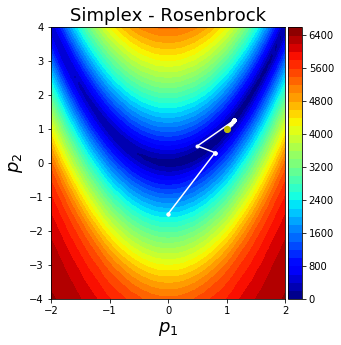

In [6]:
#plot
plt.figure(figsize=(5,5))
#for i in range(3):
#plt.plot(p0[:,0], p0[:,1], 'o-k', markersize=6)
#plt.plot(p0[3:-1,0], p0[3:-1,1], 'o-k', markersize=6)
plt.plot(p1_list, p2_list, '.w-', markersize=6)
plt.plot(1., 1., 'oy')
plt.title('Simplex - Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.show()

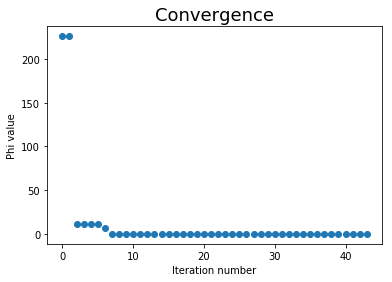

In [7]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
conv = plt.plot(f_list, 'o')
plt.show(conv)